In [8]:
#무슨 동에서 어느 업종을 많이 활용하더라
#필요없는 데이터 지우기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('chinese.csv',encoding='cp949')
#df = df[['읍면동명','업종','이용자수']]
df

,년월,이용자 구분,시도명,읍면동명,업종,방문인구,이용자수,이용금액,데이터기준일자
0,Jan-18,중국인관광객,서귀포시,남원읍,쇼핑,179846.027,744,4836000,2020-12-15
1,Jan-18,중국인관광객,제주시,연동,문화/레져,632381.932,744,3943200,2020-12-15
2,Jan-18,중국인관광객,제주시,연동,소매,632381.932,2240928,505000000000,2020-12-15
3,Jan-18,중국인관광객,제주시,연동,쇼핑,632381.932,5039112,4770000000000,2020-12-15
4,Jan-18,중국인관광객,제주시,연동,숙박,632381.932,178560,31247935272,2020-12-15
...,...,...,...,...,...,...,...,...,...
2136,Dec-18,중국인관광객,서귀포시,표선면,문화/레져,64744.126,4464,266352000,2020-12-15
2137,Dec-18,중국인관광객,서귀포시,표선면,소매,64744.126,400272,108000000000,2020-12-15
2138,Dec-18,중국인관광객,서귀포시,표선면,쇼핑,64744.126,5952,170219760,2020-12-15
2139,Dec-18,중국인관광객,제주시,삼도1동,소매,18223.999,3720,627638400,2020-12-15


In [54]:
#전체 동네별 업종 이용자수 순위 출력
def nei_rank():
    nei = ['건입동', '구좌읍', '남원읍', '노형동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동','서홍동','성산읍','송산동','아라동','안덕면','애월읍','연동','영천동','예래동','오라동','외도동','용담1동','용담2동','우도면','이도1동','이도2동','이호동','일도1동','일도2동','정방동','조천읍','중문동','중앙동','천지동','표선면','한림읍','화북동','효돈동']
    for i in nei:
        df1 = df[df.읍면동명==i]
        people = []
        item = ['문화/레져', '소매', '쇼핑', '숙박', '식음료']
        total = []
        for j in item:
            people.append(df1[df1.업종==j]['이용자수'].sum())
        for k in range(len(people)):
            total.append((people[k],item[k]))
        total.sort()
        total.reverse()
        print(i,'\n', total, '\n')

In [10]:
#전체 동네별 업종 이용률(이용자수/방문인구수)
def nei_ratio():
    df = df.drop(columns=['유흥', '교통'], axis=1)
    df['ratio']=(df['이용자수']/df['방문인구'])
    df1=df.groupby(['읍면동명','업종'])["이용금액"].sum()
    return df1

In [9]:
#무슨 동에서 어느 업종을 많이 활용하더라
#필요없는 데이터 지우기
df = pd.read_csv('chinese.csv',encoding='cp949')
df=df.sort_values('읍면동명')
df2=df[df['업종']=='교통'].index
df=df.drop(df2)
df3=df[df['업종']=='유흥'].index
df=df.drop(df3)
df

,년월,이용자 구분,시도명,읍면동명,업종,방문인구,이용자수,이용금액,데이터기준일자
451,Mar-18,중국인관광객,제주시,건입동,소매,41096.785,9646,1386130200,2020-12-15
109,Jan-18,중국인관광객,제주시,건입동,숙박,30589.440,7440,1182320160,2020-12-15
438,Mar-18,중국인관광객,제주시,건입동,쇼핑,41096.785,44520,1609524140,2020-12-15
439,Mar-18,중국인관광객,제주시,건입동,숙박,41096.785,14098,3740186044,2020-12-15
440,Mar-18,중국인관광객,제주시,건입동,식음료,41096.785,88298,6216105000,2020-12-15
...,...,...,...,...,...,...,...,...,...
270,Feb-18,중국인관광객,서귀포시,효돈동,소매,2332.337,468,7956000,2020-12-15
271,Feb-18,중국인관광객,서귀포시,효돈동,식음료,2332.337,936,15912000,2020-12-15
1926,Nov-18,중국인관광객,서귀포시,효돈동,식음료,5929.939,1342,62403000,2020-12-15
1776,Oct-18,중국인관광객,서귀포시,효돈동,쇼핑,8660.580,2163,41731480,2020-12-15


In [142]:
#각 동네별 업종 방문율
df_=df.groupby(['읍면동명','업종'])["방문인구"].sum()
df__=df.groupby(['읍면동명','업종'])["이용자수"].sum()
df___=pd.concat([df_,df__],axis=1,join='outer')
df___["ratio"]=df___["이용자수"]/df___["방문인구"]*100
df___

방문인구     이용자수       ratio
읍면동명 업종                                     
건입동  문화/레져   410288.450     3672    0.894980
     소매     1489027.677   474982   31.898803
     쇼핑      894777.024  1121544  125.343406
     숙박      894777.024   398170   44.499355
     식음료     894777.024  2319554  259.232629
...                 ...      ...         ...
화북동  쇼핑       71795.806   132773  184.931415
     식음료      29503.825     5603   18.990758
효돈동  소매        8463.893     2187   25.839174
     쇼핑       34715.023    10179   29.321599
     식음료      25517.742     8580   33.623665

[190 rows x 3 columns]

In [169]:
#각 동네별 업종 ratio Top3
dfz = df___.sort_values(by="ratio", ascending=False).groupby('읍면동명').head(3)
dfz=dfz.sort_values(by=['읍면동명','ratio'],ascending=[True, False])
dfz=dfz.reset_index(drop=False)
dfz=dfz.set_index('읍면동명')
dfz

,업종,방문인구,이용자수,ratio
읍면동명,,,,
건입동,식음료,894777.024,2319554,259.232629
건입동,쇼핑,894777.024,1121544,125.343406
건입동,숙박,894777.024,398170,44.499355
구좌읍,식음료,486993.661,265656,54.550197
구좌읍,쇼핑,486993.661,119160,24.468491
...,...,...,...,...
화북동,식음료,29503.825,5603,18.990758
화북동,소매,20578.718,1464,7.114146
효돈동,식음료,25517.742,8580,33.623665


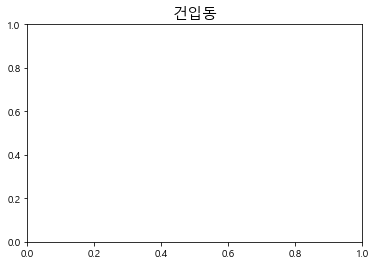

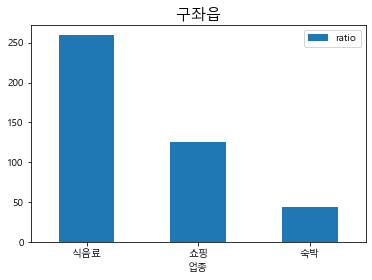

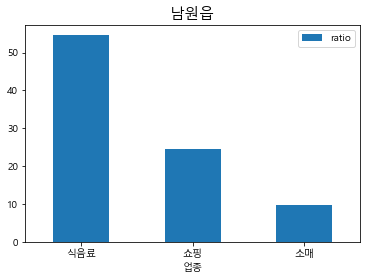

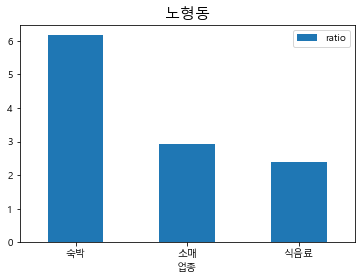

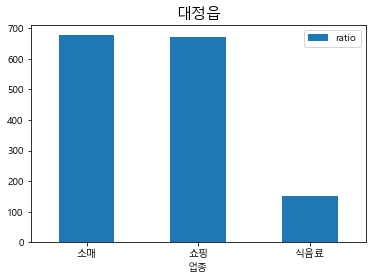

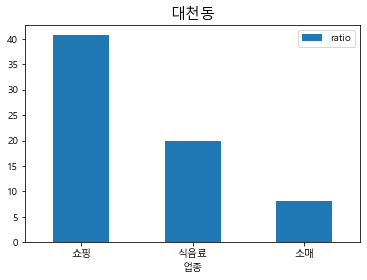

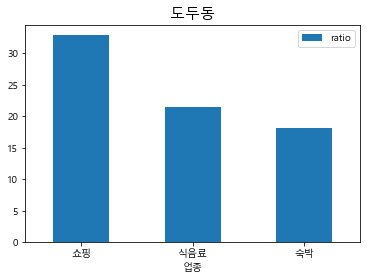

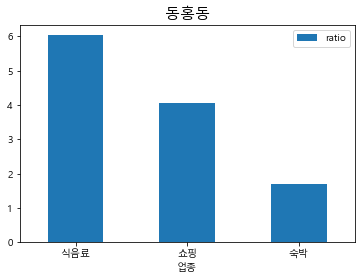

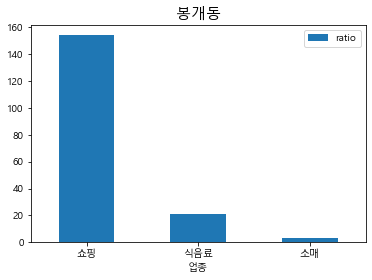

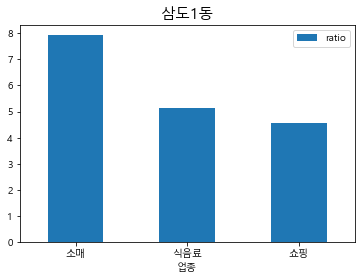

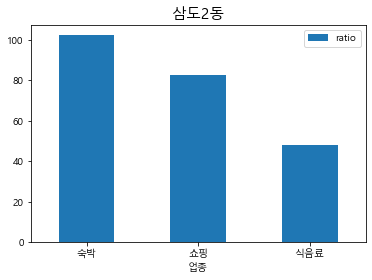

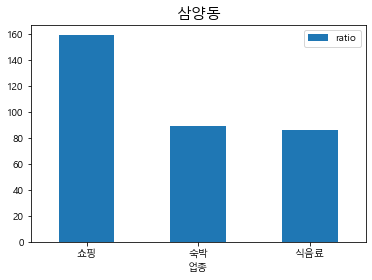

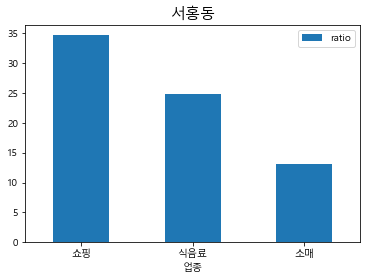

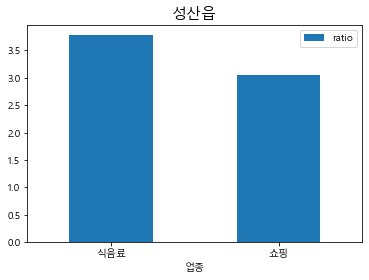

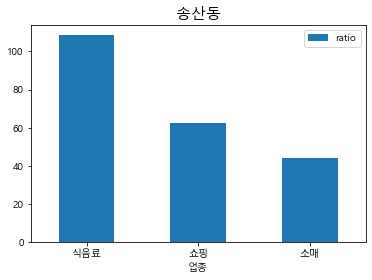

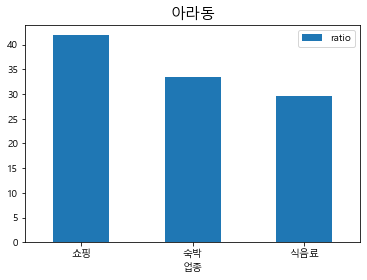

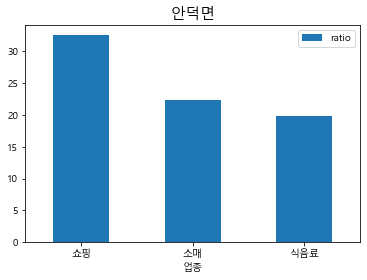

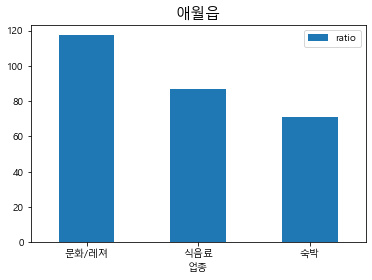

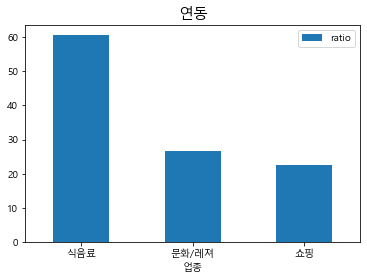

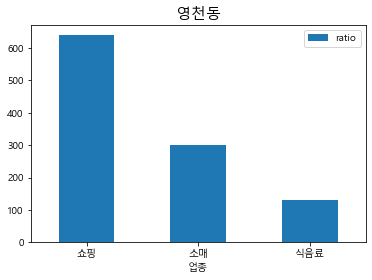

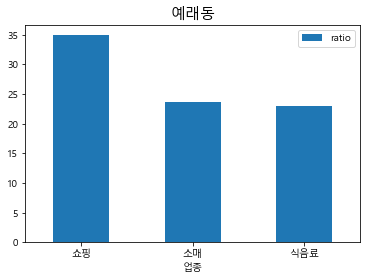

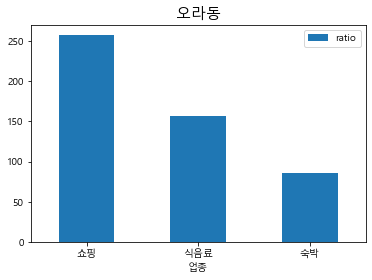

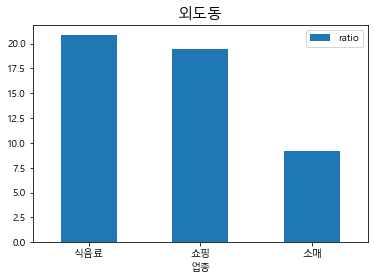

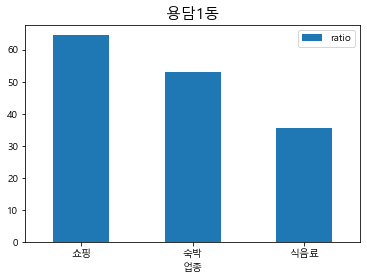

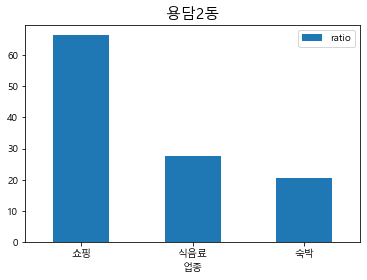

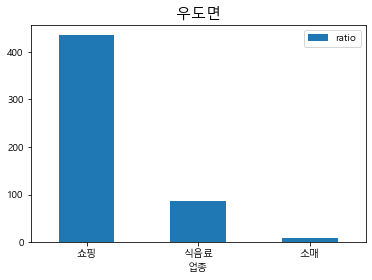

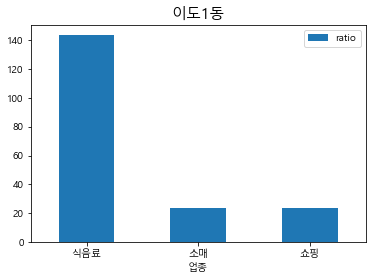

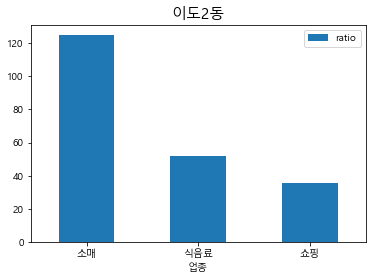

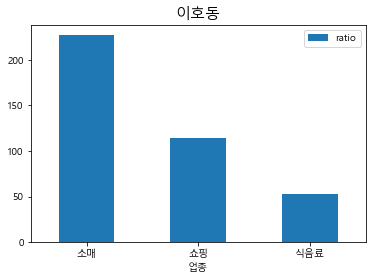

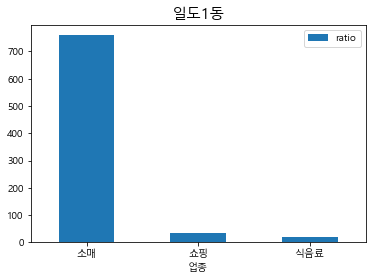

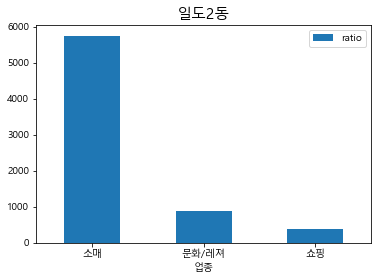

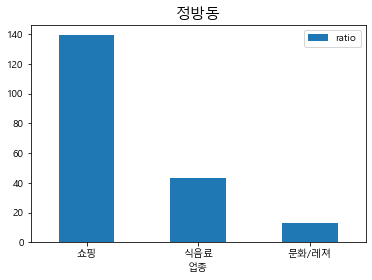

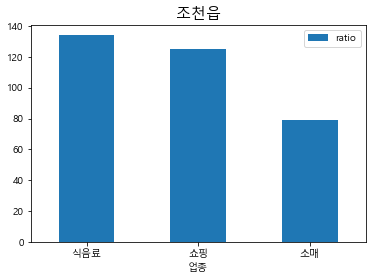

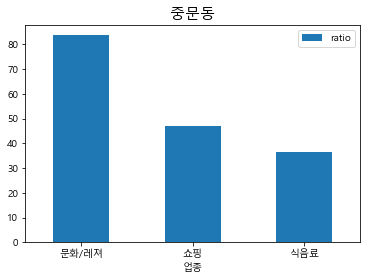

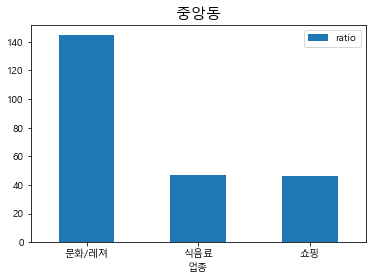

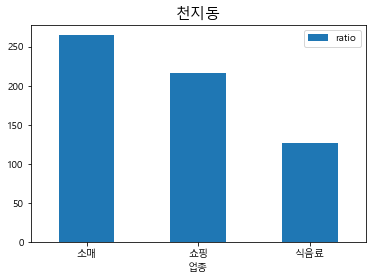

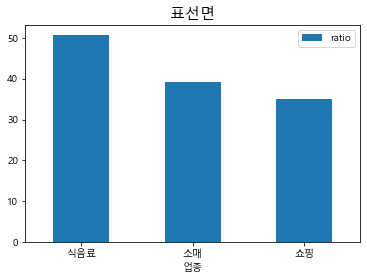

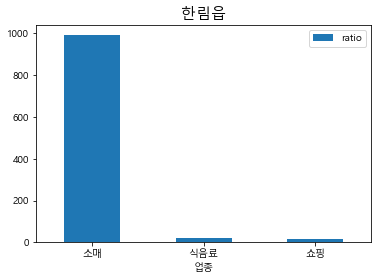

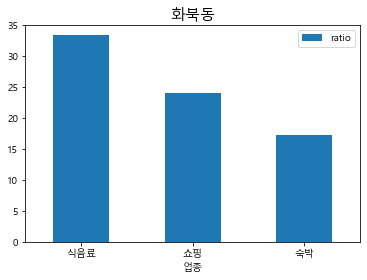

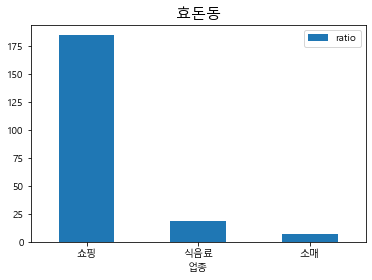

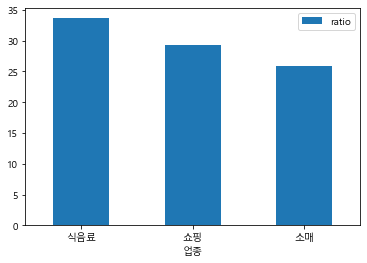

In [196]:
#한글 깨짐 해결
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#동네별 업종 방문율 Top3 막대그래프     
nei = ['건입동', '구좌읍', '남원읍', '노형동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동','서홍동','성산읍','송산동','아라동','안덕면','애월읍','연동','영천동','예래동','오라동','외도동','용담1동','용담2동','우도면','이도1동','이도2동','이호동','일도1동','일도2동','정방동','조천읍','중문동','중앙동','천지동','표선면','한림읍','화북동','효돈동']

for i in range(len(nei)):
    pl=dfz.loc[nei[i]]
    plt.title(nei[i],fontsize='15')
    pl.plot.bar(x='업종',y='ratio',rot=0)